###### ARTIFICIAL INTELLIGENCE ALGORITHMS
### Practical Assignment
# **#3**
---

In [112]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

##### 1

In [113]:
# Load iris dataset
iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
display(iris_data.head())
display(iris.data.shape)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


(150, 4)

The dataset consists of 150 samples and 4 features.

In [114]:
# Keep only 'petal width' and 'petal length' columns and drop others as instructed.
iris_data = iris_data[["petal length (cm)", "petal width (cm)"]]

In [115]:
# Scale features
scaler = StandardScaler()
scaled_iris_data = scaler.fit_transform(iris_data)

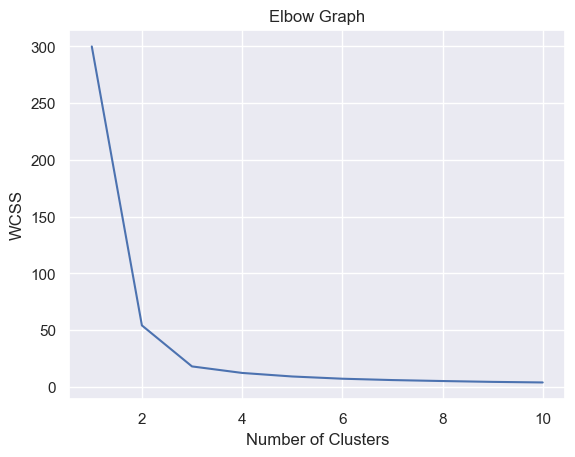

In [116]:
# Plot elbow graph

wcss = []
for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0
    )
    kmeans.fit(scaled_iris_data)
    wcss.append(kmeans.inertia_)

sns.set()
plt.plot(range(1, 11), wcss)
plt.title("Elbow Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

From the graph, we can see that the optimal value for the number of clusters, k is 5. 

##### 2

In [117]:
heart_df = pd.read_csv("./heart.csv")  # Load the dataset
display(heart_df.head(5))  # Display dataframe
display(heart_df.shape)
display(heart_df.dtypes)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


(918, 12)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

The dataframe consists of 918 samples with 12 features.

In [118]:
### Handling outliers

numeric_columns = heart_df.select_dtypes(include=["int64", "float64"])
z_scores = numeric_columns.apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)  # Filter rows that are outside 3 zscore.

# Filter out rows with outliers
heart_df_final = heart_df[~outliers]

In [119]:
# Apply one-hot-encoding to transform non-numeric columns to numeric
non_numeric_columns = heart_df.select_dtypes(exclude=["int64", "float64"])
heart_df_final = pd.get_dummies(
    heart_df_final, columns=non_numeric_columns.columns.tolist()
).astype("int")

In [120]:
target = heart_df_final["HeartDisease"]  # Backup targets before scaling
# Apply scaling for numeric columns
scaler = StandardScaler()
heart_df_final[numeric_columns.columns] = scaler.fit_transform(
    heart_df_final[numeric_columns.columns]
)
heart_df_final["HeartDisease"] = target  # Restore targets after scaling.

# Display final dataframe
heart_df_final.head(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.428154,0.465900,0.849636,-0.550362,1.384320,-0.745287,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,-0.475855,1.634714,-0.168122,-0.550362,0.752973,0.330175,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,-1.745588,-0.118507,0.793612,-0.550362,-1.535661,-0.745287,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,-0.581666,0.349019,0.149344,-0.550362,-1.141069,0.330175,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,0.053200,1.050307,-0.028064,-0.550362,-0.588640,-0.745287,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [121]:
# Split data into dependent and indepent variables
X = heart_df_final.drop("HeartDisease", axis=1)
y = heart_df_final["HeartDisease"]  # Unscaled from original dataframe

In [122]:
### Model Training

# Split data into training and testing.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# SVM model
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)

# Logistic Regression model
logr_model = LogisticRegression()
logr_model.fit(X_train, y_train)

# Random Forest model
ranf_model = RandomForestClassifier(
    n_estimators=500, max_samples=0.8, oob_score=True, random_state=408
)
ranf_model.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.8, n_estimators=500, oob_score=True,
                       random_state=408)

In [123]:
### Prediction
y_pred_svm = svm_model.predict(X_test)
y_pred_logr = logr_model.predict(X_test)
y_pred_ranf = ranf_model.predict(X_test)

In [124]:
### Evaluation
print("\tMODEL\t\t|\tACCURACY\t|\tPRECISION\t|\tRECALL\t\t|\tF1 SCORE")
print(
    "________________________________________________________________________________________________________________"
)
print(
    f"SVM\t\t\t|\t{accuracy_score(y_test, y_pred_svm):.3f}\t\t|\t{precision_score(y_test, y_pred_svm):.3f}\t\t|\t{recall_score(y_test, y_pred_svm):.3f}\t\t|\t{f1_score(y_test, y_pred_svm):.3f}\t\t"
)
print(
    f"Logistic Regression\t|\t{accuracy_score(y_test, y_pred_logr):.3f}\t\t|\t{precision_score(y_test, y_pred_logr):.3f}\t\t|\t{recall_score(y_test, y_pred_logr):.3f}\t\t|\t{f1_score(y_test, y_pred_logr):.3f}\t\t"
)
print(
    f"Random Forest\t\t|\t{accuracy_score(y_test, y_pred_ranf):.3f}\t\t|\t{precision_score(y_test, y_pred_ranf):.3f}\t\t|\t{recall_score(y_test, y_pred_ranf):.3f}\t\t|\t{f1_score(y_test, y_pred_ranf):.3f}\t\t"
)
print("\n\nConfusion Matrices:")
print("\nSVM\n", confusion_matrix(y_test, y_pred_svm))
print("\nLogistic Regression\n", confusion_matrix(y_test, y_pred_logr))
print("\nRandom Forest\n", confusion_matrix(y_test, y_pred_ranf))

	MODEL		|	ACCURACY	|	PRECISION	|	RECALL		|	F1 SCORE
________________________________________________________________________________________________________________
SVM			|	0.883		|	0.841		|	0.957		|	0.896		
Logistic Regression	|	0.883		|	0.841		|	0.957		|	0.896		
Random Forest		|	0.894		|	0.844		|	0.979		|	0.906		


Confusion Matrices:

SVM
 [[69 17]
 [ 4 90]]

Logistic Regression
 [[69 17]
 [ 4 90]]

Random Forest
 [[69 17]
 [ 2 92]]


In comparison, the Random Forest model produced better results for all metrics for given data. The SVM and Logistic Regression have comparable results

In [125]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

In [126]:
### Model Training

# Split data into training and testing.
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

# SVM model
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)

# Logistic Regression model
logr_model = LogisticRegression()
logr_model.fit(X_train, y_train)

# Random Forest model
ranf_model = RandomForestClassifier(
    n_estimators=500, max_samples=0.8, oob_score=True, random_state=408
)
ranf_model.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.8, n_estimators=500, oob_score=True,
                       random_state=408)

In [127]:
### Prediction
y_pred_svm = svm_model.predict(X_test)
y_pred_logr = logr_model.predict(X_test)
y_pred_ranf = ranf_model.predict(X_test)

In [128]:
### Evaluation
print("\tMODEL\t\t|\tACCURACY\t|\tPRECISION\t|\tRECALL\t\t|\tF1 SCORE")
print(
    "________________________________________________________________________________________________________________"
)
print(
    f"SVM\t\t\t|\t{accuracy_score(y_test, y_pred_svm):.3f}\t\t|\t{precision_score(y_test, y_pred_svm):.3f}\t\t|\t{recall_score(y_test, y_pred_svm):.3f}\t\t|\t{f1_score(y_test, y_pred_svm):.3f}\t\t"
)
print(
    f"Logistic Regression\t|\t{accuracy_score(y_test, y_pred_logr):.3f}\t\t|\t{precision_score(y_test, y_pred_logr):.3f}\t\t|\t{recall_score(y_test, y_pred_logr):.3f}\t\t|\t{f1_score(y_test, y_pred_logr):.3f}\t\t"
)
print(
    f"Random Forest\t\t|\t{accuracy_score(y_test, y_pred_ranf):.3f}\t\t|\t{precision_score(y_test, y_pred_ranf):.3f}\t\t|\t{recall_score(y_test, y_pred_ranf):.3f}\t\t|\t{f1_score(y_test, y_pred_ranf):.3f}\t\t"
)
print("\n\nConfusion Matrices:")
print("\nSVM\n", confusion_matrix(y_test, y_pred_svm))
print("\nLogistic Regression\n", confusion_matrix(y_test, y_pred_logr))
print("\nRandom Forest\n", confusion_matrix(y_test, y_pred_ranf))

	MODEL		|	ACCURACY	|	PRECISION	|	RECALL		|	F1 SCORE
________________________________________________________________________________________________________________
SVM			|	0.894		|	0.850		|	0.968		|	0.905		
Logistic Regression	|	0.883		|	0.841		|	0.957		|	0.896		
Random Forest		|	0.839		|	0.783		|	0.957		|	0.861		


Confusion Matrices:

SVM
 [[70 16]
 [ 3 91]]

Logistic Regression
 [[69 17]
 [ 4 90]]

Random Forest
 [[61 25]
 [ 4 90]]


After dimesionality reduction using Principle Component Reduction technique, the performance of all models other than Random Forest remains almost same. However, there is a noticeable drop in peformance of Random Forest with PCA applied.  The precision, recall, accuracy and f1 scores have came down little bit.